In [71]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import  to_categorical
from sklearn.preprocessing import scale, LabelEncoder


In [72]:
df = pd.read_csv('Ionosphere_data.csv')

In [73]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [74]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

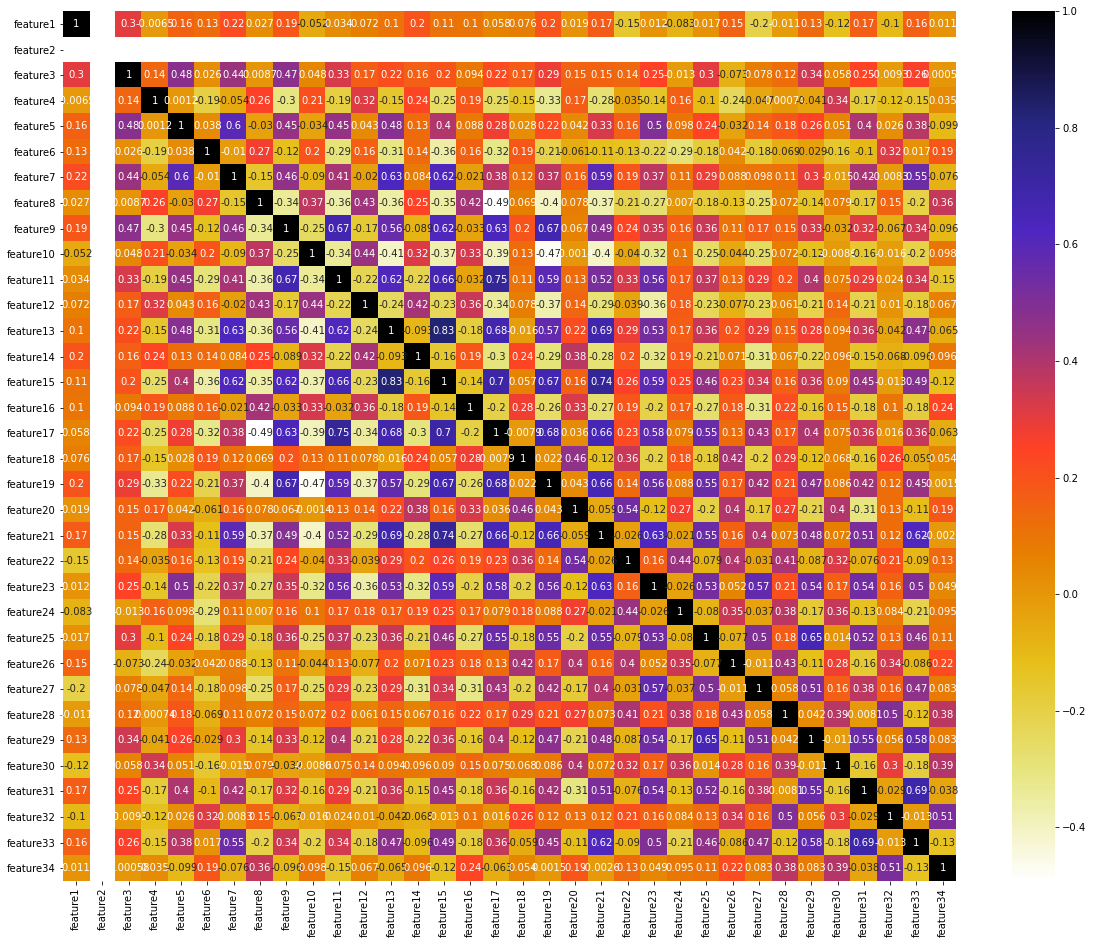

In [75]:
correlations = df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(correlations, cmap="CMRmap_r", annot = True)
plt.show()

In [76]:
df = df.drop('feature2', axis=1)

In [77]:
encoding = {'g': 1, 'b': 0}
df.label.replace(encoding, inplace=True)

In [78]:
df = df.sample(frac = 1)
df

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
148,1,0.85271,0.05426,1.00000,0.08069,1.00000,1.00000,0.91473,-0.00775,0.83721,...,0.03876,1.00000,0.71613,0.84496,0.06977,1.00000,0.87317,1.00000,1.00000,0
267,1,0.58940,-0.60927,0.85430,0.55298,0.81126,0.07285,0.56623,0.16225,0.32781,...,0.26653,0.49013,0.27687,0.46216,0.28574,0.43484,0.29324,0.40821,0.29942,1
180,1,1.00000,1.00000,-1.00000,1.00000,-1.00000,-0.82456,0.34649,0.21053,0.46053,...,-0.66667,1.00000,-1.00000,1.00000,-0.24561,0.35088,0.20175,0.82895,0.07895,0
226,0,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,0.00000,0
294,1,0.74704,-0.13241,0.53755,0.16996,0.72727,0.09486,0.69565,-0.11067,0.66798,...,-0.10474,0.61847,-0.12041,0.60079,-0.20949,0.37549,0.06917,0.61067,-0.01383,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1,0.06404,-0.15271,-0.04433,0.05911,0.08374,-0.02463,-0.01478,0.18719,0.06404,...,0.16256,0.28079,-0.04926,-0.05911,-0.09360,0.04433,0.05419,0.07389,-0.10837,0
325,1,0.89563,0.37917,0.67311,0.69438,0.35916,0.88696,-0.04193,0.93345,-0.38875,...,-0.73856,0.33531,-0.62296,0.52414,-0.42086,0.61217,-0.17343,0.60073,0.08660,1
158,1,0.08696,0.00686,0.13959,-0.04119,0.10526,-0.08238,0.12586,-0.06178,0.23341,...,-0.10297,0.08467,0.01373,0.11213,-0.06636,0.09611,-0.07323,0.11670,-0.06865,0
192,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.50000,0.04167,0.75000,-0.22917,-1.00000,-0.12500,-0.27083,-0.19792,-0.93750,0


In [79]:
train_data = df.iloc[:211,:]
train_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
148,1,0.85271,0.05426,1.00000,0.08069,1.00000,1.00000,0.91473,-0.00775,0.83721,...,0.03876,1.00000,0.71613,0.84496,0.06977,1.00000,0.87317,1.00000,1.00000,0
267,1,0.58940,-0.60927,0.85430,0.55298,0.81126,0.07285,0.56623,0.16225,0.32781,...,0.26653,0.49013,0.27687,0.46216,0.28574,0.43484,0.29324,0.40821,0.29942,1
180,1,1.00000,1.00000,-1.00000,1.00000,-1.00000,-0.82456,0.34649,0.21053,0.46053,...,-0.66667,1.00000,-1.00000,1.00000,-0.24561,0.35088,0.20175,0.82895,0.07895,0
226,0,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,0.00000,0
294,1,0.74704,-0.13241,0.53755,0.16996,0.72727,0.09486,0.69565,-0.11067,0.66798,...,-0.10474,0.61847,-0.12041,0.60079,-0.20949,0.37549,0.06917,0.61067,-0.01383,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,1,0.00000,0.00000,-1.00000,-0.62766,1.00000,0.51064,0.07979,-0.23404,-1.00000,...,0.00000,-0.19149,-0.46809,-0.22340,-0.48936,0.74468,0.90426,-0.67553,0.45745,0
147,1,1.00000,-0.01081,1.00000,-0.02703,1.00000,-0.06486,0.95135,-0.01622,0.98919,...,0.09189,0.98556,0.01251,1.00000,-0.03243,1.00000,0.02703,1.00000,-0.07027,1
106,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.62195,...,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
232,0,1.00000,1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,0


In [80]:
test_data = df.iloc[211:,:]
test_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
341,1,0.98002,0.00075,1.00000,0.00000,0.98982,-0.00075,0.94721,0.02394,0.97700,...,0.08107,0.96709,0.07255,0.95701,0.08088,0.98190,0.08126,0.97247,0.08616,1
144,1,0.62745,-0.07843,0.72549,0.00000,0.60784,-0.07843,0.62745,-0.11765,0.68627,...,-0.25490,0.52409,-0.24668,0.56863,-0.31373,0.43137,-0.21569,0.47059,-0.27451,0
179,1,1.00000,-0.08183,1.00000,-0.11326,0.99246,-0.29802,1.00000,-0.33075,0.96662,...,-0.96296,0.48757,-0.85669,0.37941,-0.83893,0.24117,-0.88846,0.29221,-0.89621,1
266,1,0.76627,0.21106,0.63935,0.38112,0.48409,0.52500,0.15000,0.22273,0.13753,...,-0.03229,-0.33942,-0.12486,-0.27540,-0.19714,-0.19962,-0.24648,-0.11894,-0.27218,1
139,1,1.00000,-0.37838,0.64865,0.29730,0.64865,-0.24324,0.86486,0.18919,1.00000,...,-0.29730,0.61031,-0.22163,0.58478,-0.23027,0.72973,-0.59459,0.51351,-0.24324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1,0.06404,-0.15271,-0.04433,0.05911,0.08374,-0.02463,-0.01478,0.18719,0.06404,...,0.16256,0.28079,-0.04926,-0.05911,-0.09360,0.04433,0.05419,0.07389,-0.10837,0
325,1,0.89563,0.37917,0.67311,0.69438,0.35916,0.88696,-0.04193,0.93345,-0.38875,...,-0.73856,0.33531,-0.62296,0.52414,-0.42086,0.61217,-0.17343,0.60073,0.08660,1
158,1,0.08696,0.00686,0.13959,-0.04119,0.10526,-0.08238,0.12586,-0.06178,0.23341,...,-0.10297,0.08467,0.01373,0.11213,-0.06636,0.09611,-0.07323,0.11670,-0.06865,0
192,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.50000,0.04167,0.75000,-0.22917,-1.00000,-0.12500,-0.27083,-0.19792,-0.93750,0


In [81]:
train_labels = train_data.pop('label')
train_labels

148    0
267    1
180    0
226    0
294    1
      ..
176    0
147    1
106    0
232    0
293    1
Name: label, Length: 211, dtype: int64

In [82]:
test_labels = test_data.pop('label')
test_labels

341    1
144    0
179    1
266    1
139    1
      ..
238    0
325    1
158    0
192    0
117    1
Name: label, Length: 140, dtype: int64

In [83]:
from sklearn.preprocessing import StandardScaler
train_data = StandardScaler().fit_transform(train_data)
train_data

array([[ 0.33245498,  0.37505841,  0.03340479, ...,  1.68598632,
         1.24627628,  2.21572622],
       [ 0.33245498, -0.17641894, -1.48021612, ...,  0.54057417,
         0.13916418,  0.6252548 ],
       [ 0.33245498,  0.68354309,  2.19079305, ...,  0.35987347,
         0.92627844,  0.12473918],
       ...,
       [ 0.33245498, -1.4108603 , -0.09037119, ..., -0.03860031,
        -0.62450913, -0.05449477],
       [-3.00792604,  0.68354309,  2.19079305, ..., -2.01368722,
        -2.49529455, -2.32471577],
       [ 0.33245498,  0.42743944, -0.27633169, ..., -0.25329226,
         0.85483314, -0.06682207]])

In [84]:
test_data = StandardScaler().fit_transform(test_data)
test_data

array([[ 0.37176791,  0.74303209, -0.11429996, ...,  0.23095399,
         1.1960269 ,  0.17017955],
       [ 0.37176791,  0.06671007, -0.29249248, ..., -0.3394842 ,
         0.19506095, -0.54324374],
       [ 0.37176791,  0.78135898, -0.30014409, ..., -1.63186911,
        -0.16070598, -1.77299742],
       ...,
       [ 0.37176791, -0.97009196, -0.10054956, ..., -0.06581986,
        -0.51074889, -0.13604237],
       [ 0.37176791, -1.13690412, -0.11598781, ..., -0.44540763,
        -1.13823735, -1.85467111],
       [ 0.37176791,  0.74648496, -0.11598781, ...,  0.3911454 ,
         0.43002508,  0.33754236]])

In [85]:
n_features = train_data.shape[1]
n_features

33

In [86]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (n_features,)))
model.add(Dropout(0.3))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                544       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 12)                204       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                

In [88]:
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 12)

Epoch 1/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7355 - accuracy: 0.5355
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7208 - accuracy: 0.5545
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.6682
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.6777
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6825
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7299
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.7062
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.7441
Epoch 9/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.7346
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7773
Epoch 11/

In [89]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,epoch
95,0.022740,0.995261,95
96,0.035664,0.990521,96
97,0.067956,0.981043,97
98,0.043096,0.985782,98
99,0.035808,0.990521,99


In [90]:
predictions = model.predict(test_data)
predictions[:10]

array([[9.9649882e-01],
       [9.9483192e-01],
       [9.9618697e-01],
       [9.9523455e-01],
       [9.9372667e-01],
       [4.3596944e-01],
       [9.9461949e-01],
       [9.9346238e-01],
       [9.4258785e-04],
       [1.5892187e-01]], dtype=float32)

In [91]:
testing = model.evaluate(test_data, test_labels)
testing

5/5 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.9357


[0.2971220016479492, 0.9357143044471741]